In [ ]:
# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

The problem is a classification problem.
Because the target(passed) takes two discrete values 'yes','no'
In the problem execution these strings are converted to ones and zeros. yes=1, no=0.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [2]:
# Import libraries
import numpy as np
import pandas as pd

In [3]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [4]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = student_data.shape[1] - 1 #I ignored the last column as it is the target
n_passed = student_data[student_data.passed == 'yes'].shape[0]
n_failed = student_data[student_data.passed == 'no'].shape[0]
grad_rate = (n_passed*1.0/n_students)*100.0
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [5]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows
print y_all.head()

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [6]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
y_all = y_all.replace(['yes', 'no'], [1, 0])#This converts 'yes','no', to 0s and 1s
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

#print X_all.head()  # print the first 5 rows
#print y_all.head()

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [7]:
from sklearn.cross_validation import train_test_split

# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data
print y_all.dtypes;


Training set: 300 samples
Test set: 95 samples
int64


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [8]:
# Train a model
import time
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return (end - start)

# Fit model to training data
clf = DecisionTreeClassifier(random_state=0)
train_classifier(clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.005


0.005348920822143555

In [9]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    #return f1_score(target.values, y_pred, pos_label='yes')
    return f1_score(target.values, y_pred) , (end - start)

#print y_train.head()
#print X_train.head()
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: (1.0, 0.0005328655242919922)


In [10]:
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: (0.71544715447154461, 0.0009250640869140625)


In [11]:
from sklearn import svm, grid_search, naive_bayes
from astropy.table import Table, Column

# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    trainingTime = train_classifier(clf, X_train, y_train)
    trainingF1,trainSetTime =predict_labels(clf, X_train, y_train);
    print "F1 score for training set: {}".format(trainingF1)
    testingF1,testSetTime =predict_labels(clf, X_test, y_test)
    print "F1 score for test set: {}".format(testingF1)
    return trainingTime,trainingF1,trainSetTime,testingF1,testSetTime

def plot_table(trainingTime100, trainSetTime100, trainingF1100,testSetTime100, testingF1100):
    t = Table(names=('Training set size','Training time (secs)', 'Prediction time (secs)-Training set', 'F1 score for training set', 'Prediction time (secs)-Testing set', 'F1 score for testing set'), dtype=('i4','f4', 'f4', 'f4','f4', 'f4'))
    t.add_row((100, trainingTime100, trainSetTime100, trainingF1100,testSetTime100, testingF1100))
    t
    
#Start iterating for 3 types of classifiers
for iter in range(1, 5):
    # classifierType=1, SVC
    # classifierType=2, GaussianNB
    # classifierType=3, DecisionTreeClassifier
    #print iter
    classifierType=iter

    if (classifierType==1):
        #SVC
        #clf= SVC(gamma=2, C=1)
        clf= SVC()

    if (classifierType==2):
        #GaussianNB
        clf= GaussianNB()           

    if (classifierType==3):    
        #Decision Tree Classifier
        clf = DecisionTreeClassifier(random_state=0)        
        
    if (classifierType==4):
        #GridSearchCV with SVC
        parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
        svr = svm.SVC()
        clf = grid_search.GridSearchCV(svr, parameters)
        
    #Default one with 300 trainign samples   
    if (classifierType==1):
        trainingTime300_1,trainingF1300_1,trainSetTime300_1,testingF1300_1,testSetTime300_1=train_predict(clf, X_train, y_train, X_test, y_test)
    if (classifierType==2):
        trainingTime300_2,trainingF1300_2,trainSetTime300_2,testingF1300_2,testSetTime300_2=train_predict(clf, X_train, y_train, X_test, y_test)
    if (classifierType==3):
        trainingTime300_3,trainingF1300_3,trainSetTime300_3,testingF1300_3,testSetTime300_3=train_predict(clf, X_train, y_train, X_test, y_test)
    
    # TODO: Run the helper function above for desired subsets of training data
    # Note: Keep the test set constant
    #trainingTime,trainingF1,trainSetTime,testingF1,testSetTime

    #Check for 200 training samples
    #get 200 samples from training set
    X_train_200 = X_train.iloc[0:200,:]
    y_train_200 = y_train[0:200]
    if (classifierType==1):
        trainingTime200_1,trainingF1200_1,trainSetTime200_1,testingF1200_1,testSetTime200_1=train_predict(clf, X_train_200, y_train_200, X_test, y_test)
    if (classifierType==2):
        trainingTime200_2,trainingF1200_2,trainSetTime200_2,testingF1200_2,testSetTime200_2=train_predict(clf, X_train_200, y_train_200, X_test, y_test)
    if (classifierType==3):
        trainingTime200_3,trainingF1200_3,trainSetTime200_3,testingF1200_3,testSetTime200_3=train_predict(clf, X_train_200, y_train_200, X_test, y_test)
        

    #Check for 100 training samples
    #get 100 samples from training set
    X_train_100 = X_train.iloc[0:100,:]
    y_train_100 = y_train[0:100]
    if (classifierType==1):
        trainingTime100_1,trainingF1100_1,trainSetTime100_1,testingF1100_1,testSetTime100_1=train_predict(clf, X_train_100, y_train_100, X_test, y_test)
    if (classifierType==2):
        trainingTime100_2,trainingF1100_2,trainSetTime100_2,testingF1100_2,testSetTime100_2=train_predict(clf, X_train_100, y_train_100, X_test, y_test)
    if (classifierType==3):
        trainingTime100_3,trainingF1100_3,trainSetTime100_3,testingF1100_3,testSetTime100_3=train_predict(clf, X_train_100, y_train_100, X_test, y_test)
    
    #print trainingTime100,trainingF1100,trainSetTime100,testingF1100,testSetTime100
    
    #if (classifierType==1):
    #    t1 = Table(names=('Training set size','Training time (secs)', 'Prediction time (secs)-Training set', 'F1 score for training set', 'Prediction time (secs)-Testing set', 'F1 score for testing set'), dtype=('i4','f4', 'f4', 'f4','f4', 'f4'))
    #    t1.add_row((100, trainingTime100, trainSetTime100, trainingF1100,testSetTime100, testingF1100))
    #   t1
    
    
    #t1 = Table(names=('a', 'b', 'c'), dtype=('f4', 'i4', 'S2'))
    #t1.add_row((1, 2.0, 'x'))
    #t1.add_row((4, 5.0, 'y'))
    #t1
    
    #print 'Done!!!!!!!!!!!!!!!!!!'
    
    #from astropy.table import Table, Column
    #t = Table(names=('Training set size','Training time (secs)', 'Prediction time (secs)-Training set', 'F1 score for training set', 'Prediction time (secs)-Testing set', 'F1 score for testing set'), dtype=('i4','f4', 'f4', 'f4','f4', 'f4'))
    #t.add_row((100, trainingTime100, trainSetTime100, trainingF1100,testSetTime100, testingF1100))
    #t.add_row((4, 5.0, 'y'))
    #t

    
#from astropy.table import Table, Column
#t = Table(names=('a', 'b', 'c'), dtype=('f4', 'i4', 'S2'))
#t.add_row((1, 2.0, 'x'))
#t.add_row((4, 5.0, 'y'))
#t
#from astropy.table import Table, Column
t1 = Table(names=('Type','Training set','Training time', 'Prediction time-Training', 'F1 score-Training', 'Prediction time-Testing', 'F1 score-Testing'), dtype=('S13','i4','f4', 'f8', 'f4','f4', 'f4'))
t1.add_row(('SVC',100, trainingTime100_1, trainSetTime100_1, trainingF1100_1,testSetTime100_1, testingF1100_1))
t1.add_row(('SVC',200, trainingTime200_1, trainSetTime200_1, trainingF1200_1,testSetTime200_1, testingF1200_1))
t1.add_row(('SVC',300, trainingTime300_1, trainSetTime300_1, trainingF1300_1,testSetTime300_1, testingF1300_1))
t1.add_row(('GaussianNB',100, trainingTime100_2, trainSetTime100_2, trainingF1100_2,testSetTime100_2, testingF1100_2))
t1.add_row(('GaussianNB',200, trainingTime200_2, trainSetTime200_2, trainingF1200_2,testSetTime200_2, testingF1200_2))
t1.add_row(('GaussianNB',300, trainingTime300_2, trainSetTime300_2, trainingF1300_2,testSetTime300_2, testingF1300_2))
t1.add_row(('DecisionTrees',100, trainingTime100_3, trainSetTime100_3, trainingF1100_3,testSetTime100_3, testingF1100_3))
t1.add_row(('DecisionTrees',200, trainingTime200_3, trainSetTime200_3, trainingF1200_3,testSetTime200_3, testingF1200_3))
t1.add_row(('DecisionTrees',300, trainingTime300_3, trainSetTime300_3, trainingF1300_3,testSetTime300_3, testingF1300_3))

t1


------------------------------------------
Training set size: 300
Training SVC...
Done!
Training time (secs): 0.009
Predicting labels using SVC...
Done!
Prediction time (secs): 0.007
F1 score for training set: 0.873913043478
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.815789473684
------------------------------------------
Training set size: 200
Training SVC...
Done!
Training time (secs): 0.004
Predicting labels using SVC...
Done!
Prediction time (secs): 0.004
F1 score for training set: 0.874125874126
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.789115646259
------------------------------------------
Training set size: 100
Training SVC...
Done!
Training time (secs): 0.001
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.905405405405
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.82119205298
-----------

Type,Training set,Training time,Prediction time-Training,F1 score-Training,Prediction time-Testing,F1 score-Testing
str13,int32,float32,float64,float32,float32,float32
SVC,100,0.00139499,0.000978946685791,0.905405,0.000945091,0.821192
SVC,200,0.0044198,0.0036199092865,0.874126,0.0017879,0.789116
SVC,300,0.00906301,0.00712203979492,0.873913,0.00226402,0.815789
GaussianNB,100,0.000622034,0.00032901763916,0.809524,0.000329018,0.694915
GaussianNB,200,0.000721931,0.000385999679565,0.754237,0.000299215,0.695652
GaussianNB,300,0.000874996,0.000479936599731,0.776119,0.000299931,0.709677
DecisionTrees,100,0.00100183,0.000190019607544,1.0,0.000168085,0.705882
DecisionTrees,200,0.00148702,0.000236988067627,1.0,0.000188828,0.715447
DecisionTrees,300,0.00221515,0.000228881835938,1.0,0.000173092,0.715447


I have used three classifers for fitting the data. The models are
1> SVC
2> Gaussian NB
3> Decision Trees

1> SVC:- 
   Observations:- 1> SVC gave a lower F1 score,with an increase in tthe Training set sizes.
                  2> SVC (100 training size) gave  the best F1 score for testing set as compared to GaussianNB and DecisionTress
                  3> Training and prediction times are larger than those observed with GaussianNB and Decision trees
   Advantages : SVC is very efficient in high dimensional space and particluarly when the number of features  is is less than the number of samples. Our problem here is high dimensional and sample size (100,200,300) is signifcantly larger the the number of features(48). SInce SVC uses a subset of training points is is effecient in terms of memory usage. 
   Disdvantages:-SVC is slow as compared to the other methods used here.
   Given what you know about the data so far, why did you choose this model to apply? - In this data set the number of features is significantly smaller than the number of samples, and SVC is apt for these kind of data. 
   
2> GaussianNB:-  
   Observations:- 1> GaussianNB is extremely fast and the best in terms of training and test execution time as compared to SVC and decisiontrees.
                  2> It showed a monotonous increase behavior for F1 score with respect to the number of training points. We have got 0.709677(300), 0.695652(200) and 0.694915(100) which is monotonically increasing with the number of training pointds
                  3> The training time increased with the number of training points used to train the model
   Advantages : Very fast. If I belive the results we got here, I would happy using GaussianNB only with 100 training points because it did not give a significant raise with the increase in the training points. Probably this mthod is good with a smaller sample set.
   Disadvantages :- Not accurate, because the F1 scores are low as compared to the other method
   Given what you know about the data so far, why did you choose this model to apply? - Gaussian NB is applicable particularly when the sample size is low. Here we have 100,200 or 300 samples which is not that huge and therfore GaussianNB is apt. In addition, it is the fastest as compared to the other models
   Another disadvantage is that when a given class and feature value do not occur together in the traiiing set then the probability estimate will be zero. The issue is that this will eliminate other information in other probablities when those are multiplied which this zero probability.
   
3> DecisionTrees:-
   Observations:- 1> The training time increases mononically with the number of samples used in the training set
                  2> The F1 score for test data increases mononically with the number of samples used in the training set
                  3> The F1 scores fot training data remain same with a change in the number of training samples.
   Discussion :-  Since the F1 score of training data is constant, we might think that the model is memorizing the trainign data, hence the F1 doesnt change. The bigO notation, O(mtry * nlog(n)), where n is the number of objects and mtry is the number of attributes.   Expected to be slow with the number of training points. With an increase in depth the trees become complex but are very fast as compared to the other methods here. This is what is observed when we look at the training time with respect to the number of samples in the training set in the above table. This also means that the decision trees can be unstable with a small variation in data, which is mitigated by the use of trees within an ensemble. 
   Advantages:-    Some of the advantages of decisiontrees are,
     1> These are simple to visualize and interpret and decision trees do not need any preprocessing of data.
     2> The cost is logarithmic
     3> Decision trees can handle continuos and discrete target values.
     4> In a decision tree the conditions can be explained as boolean logic i.e.e white-box model
     
   Given what you know about the data so far, why did you choose this model to apply? - Intuitively in an underfit data model, we should see that with the increase in sample size the F1 score should increase. This monotonous increase goes to a stauration level. And, in addition the sanmple size is not huge and even though decision trees are slow, with this sample size it is very acceptable. In addition, we do not need to process data to visualize and implement decision trees in this dataset. Also, there are very limited number of features, that means the trees are not complex, which enables decision trees to be a good candidate 

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [14]:
from sklearn import linear_model
#GridSearchCV with SVC
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#parameters = {"n_estimators": [1 - 20]}
parameters={'C' : [.005,.05,.5,1.,10.,100.,],
'fit_intercept' : [True, False],
'class_weight': [ None,'balanced'],
'random_state' : [None,42],
    'penalty': ['l1', 'l2']
   }
svr = svm.SVC()

dtc = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
min_samples_split=16, min_weight_fraction_leaf=0.0,
presort=False, random_state=None, splitter='best')

dtr_params = {'criterion':("gini","entropy"),'presort':("True","False"),'min_weight_fraction_leaf':(0,0.25,0.5), 'min_samples_leaf':(1,2,3),'min_samples_split':(2,4,8,16,32),'min_samples_split':(2,4,8,16), 'max_features':("auto","sqrt","log2"),'max_depth':np.arange(1,5,1)}

dtc2 = DecisionTreeClassifier(random_state=0)

lr = linear_model.LogisticRegression()

clf = grid_search.GridSearchCV(dtc2, dtr_params)     

#Default one with 300 trainign samples    
train_predict(clf, X_train, y_train, X_test, y_test)

------------------------------------------
Training set size: 300
Training GridSearchCV...
Done!
Training time (secs): 20.332
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.825892857143
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.814285714286


(20.33225703239441,
 0.8258928571428571,
 0.00028395652770996094,
 0.81428571428571428,
 0.0001838207244873047)

I tried the following,
1> LogisticRgresstion
2> DecisionTreeClassifier (DTC)
3> SVC
The best I found out is with DTC
------------------------------------------
Training set size: 300
Training GridSearchCV...
Done!
Training time (secs): 20.332
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.825892857143
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000

In [15]:
from sklearn.metrics import make_scorer

def performance_metric(label, prediction):
    return f1_score(label, prediction, pos_label=1)

scorer = make_scorer(performance_metric)
#clf = grid_search.GridSearchCV(svr, parameters, scorer )
clf = grid_search.GridSearchCV(dtc2, dtr_params, scorer )

clf.fit(X_train, y_train)
best_clf = clf.best_estimator_
train_predict(clf, X_train, y_train, X_test, y_test)


------------------------------------------
Training set size: 300
Training GridSearchCV...
Done!
Training time (secs): 21.993
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.812121212121
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.8


(21.992584943771362,
 0.81212121212121213,
 0.0002930164337158203,
 0.79999999999999993,
 0.0002009868621826172)


Training set size: 300
Training GridSearchCV...
Done!
Training time (secs): 21.993
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.812121212121
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.8

Therefore the final F1 score was inncreased to 0.812121212121

I have used three classifers for fitting the data. The models are
1> SVC
2> Gaussian NB
3> Decision Trees

1> SVC:- 
  Observations:- 1> SVC gave a lower F1 score,with an increase in tthe Training set sizes. 
                  2> SVC (100 training size) gave  the best F1 score for testing set as compared to GaussianNB and DecisionTress
                  3> Training and prediction times are larger than those observed with GaussianNB and Decision trees
   Advantages : SVC is very efficient in high dimensional space and particluarly when the number of features  is is less than the number of samples. Our problem here is high dimensional and sample size (100,200,300) is signifcantly larger the the number of features(48). SInce SVC uses a subset of training points is is effecient in terms of memory usage. 
   The F1 score was the best for the test set. This is reasonable good and the best part is that we get it with 100 samples. Therefore the customer does not need a lot number of samples to fit the data. However the issue is that the training and prediction times are larger as compared to GaussianNB and DecisionTrees. But since we can get away with just using 100 samples, this method gave the same computation time with 100 samples as compared to GaussianNB and Decision trees with 300 samples. 
   Again, we have observed that if we use SVC in conjunction with GridSearchCV we were able to increase the F1 score, but this came at a cost of the computation time.
   
   
2> GaussianNB:-  
   Observations:- 1> GaussianNB is extremely fast and the best in terms of training and test execution time as compared to SVC and decisiontrees.
                  2> It showed a monotonous increase behavior for F1 score with respect to the number of training points. We have got 0.709677(300), 0.695652(200) and 0.694915(100) which is monotonically increasing with the number of training pointds
                  3> The training time increased with the number of training points used to train the model
   Advantages : Very fast. If I belive the results we got here, I would happy using GaussianNB only with 100 training points because it did not give a significant raise with the increase in the training points. Probably this mthod is good with a smaller sample set.
   Disadvantages :- Not accurate, because the F1 scores are low as compared to the other method
   Given what you know about the data so far, why did you choose this model to apply? - Gaussian NB is applicable particularly when the sample size is low. Here we have 100,200 or 300 samples which is not that huge and therfore GaussianNB is apt. In addition, it is the fastest as compared to the other models
   Another disadvantage is that when a given class and feature value do not occur together in the traiiing set then the probability estimate will be zero. The issue is that this will eliminate other information in other probablities when those are multiplied which this zero probability.
   
   
3> DecisionTrees:-
   Observations:- 1> The training time increases mononically with the number of samples used in the training set
                  2> The F1 score for test data increases mononically with the number of samples used in the training set
                  3> The F1 scores fot training data remain same with a change in the number of training samples.
   Discussion :-  Since the F1 score of training data is constant, we might think that the model is memorizing the trainign data, hence the F1 doesnt change. The bigO notation, O(mtry * nlog(n)), where n is the number of objects and mtry is the number of attributes.   Expected to be slow with the number of training points. With an increase in depth the trees become complex but are very fast as compared to the other methods here. This is what is observed when we look at the training time with respect to the number of samples in the training set in the above table. This also means that the decision trees can be unstable with a small variation in data, which is mitigated by the use of trees within an ensemble.
This method is good, and I would suggest a customer to use this method provided the number of features is less. With a higher number of features we would get instability. Another observation is that with an increase in the number of training samples we saw that the F1 score increased, this is a good sign. Therefore if we have a good number of samples then this is an appropriate method. The coputation times also linearly depended on the number of training samples. So  it a simple trade off...FOR HIGHER ACCURACE(F1) USE A LARGER NUMBER OF TRAINING SET BUT AGAIN BE HAPPY WITH THE COMPUTATION TIME.   
   
   
Based on the current dataset,
I would prefer DTC with GridSearchCV as the best classifier model. The final F1 score for test data is 0.789115646259.

EXPLANATION OF DTC TO A CUSTOMER:-
A DTC uses a tree-like graph of decisions and possible consequences. It is more like a flowchart like structure in which each node represents a logic test and each brach represents the possible outcomes. 

Let us consider an example taken from "http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf".
The problem is defined as, "Will a person X, play golf ? This depends on the temperature, outlook, humidity and windy or not ". The test data consists of X's decisions in the last few days. 
Temperature can be "hot", "cool" or "mild"...
Outlook can be "sunny", "overcast" or "rain"
Humidity can be "high" or "normal"
Windy can be "true" or "false"
Few observations are,
1> On 07-05, when it was "hot", "sunny", "high" humidity and not windy, X did not play
2> On 07-07, when it was "hot", "overcast", humidity and not windy, X did  play
All the observations are given by,


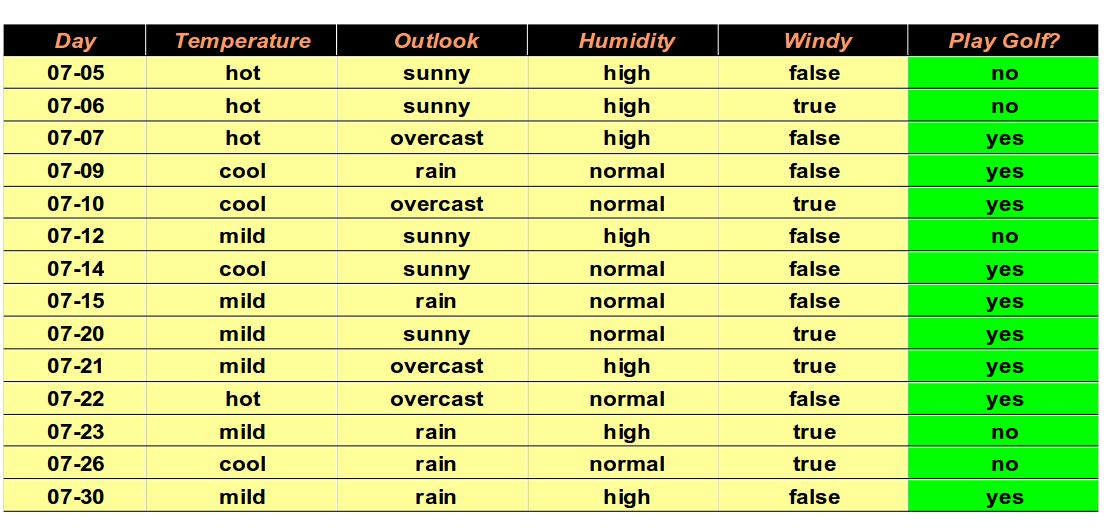

In [16]:
from IPython.display import Image
Image(filename='./DT_Test1.png')

The objective is to predict if X will play golf today and tomorrow. The conditions are given by,

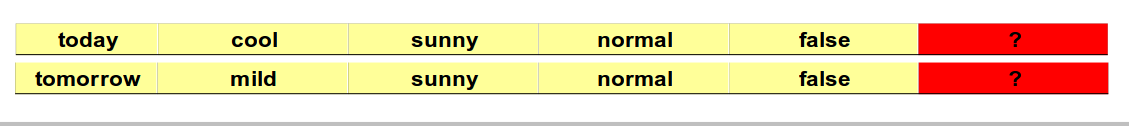

In [17]:
from IPython.display import Image
Image(filename='./DT_Train1.png')

Based on the test set a tree is constructed as,

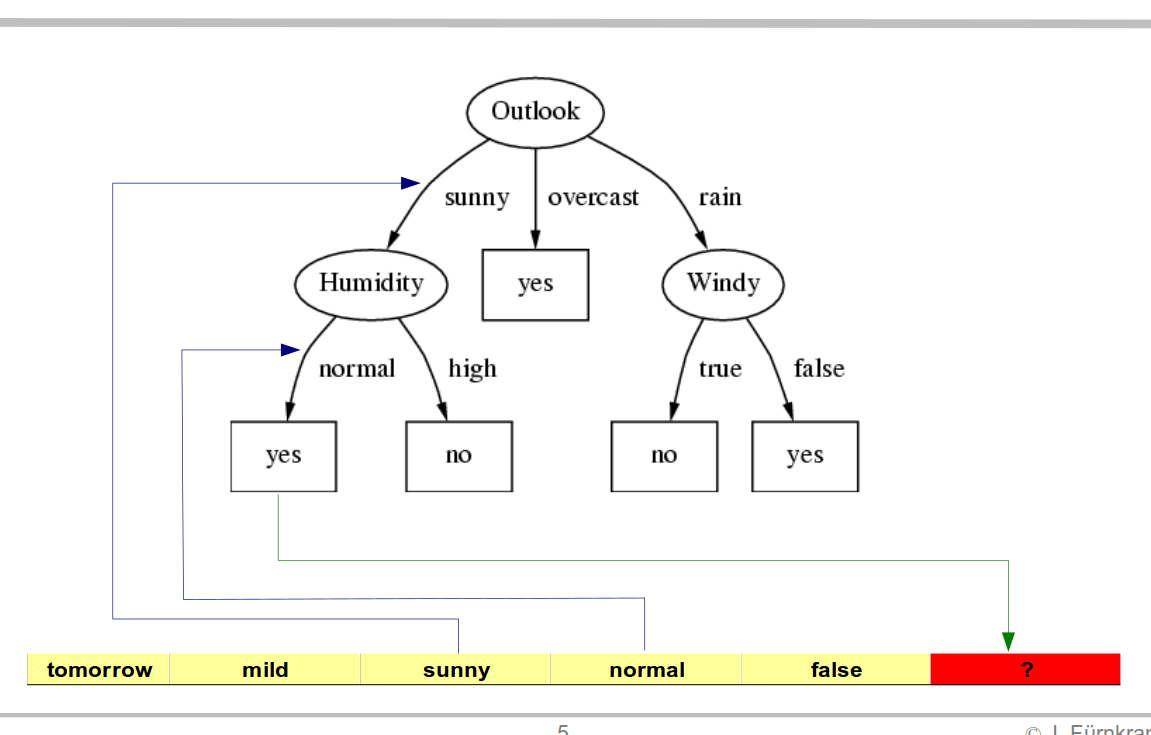

In [18]:
from IPython.display import Image
Image(filename='./DT1.png')

Here each node specifies a feature like Outlook or humidity etcc and each branch takes the possible value for the feature such as "sunny" or "overcast" etc.. and then it leads to a decision ("yes" or "no") or a leaf node .

Therefore, for an instance, the analysis begins from the root, testing the attribute specified by the node, then moving down the branch corresponding to the value given for that attribute in that instance. This is repeated for the subtree with the node being the new root. A decision tree represnets a disjunction of conjunctions of constrains of a set of attributes values of an instance. A decision tree consists of,
Nodes:: This is used as a test for the value of a certain attribute
Edges :: Corresponds to the outcome of a certain test, and it connecrts to th next node or leaf
Leaves:: Terminal nodes that predict the outcome.

A simple example can be illustrated based on the following steps,
Step-1:- Start from the root
Step-2:- Perform the test
Step-3:- Traverse through the edge corresponding to the outcome
Step-4:- Goto 2 unless leaf
Step-4:- Predict the outcome associated with the leaf

